# Regularized Linear Models

Simply speaking, a good model generalized well. However, a **high-bias model** is usually the result of a model that misses important information and thus underfits while a **high-variance model** is too sensitive, thus has high variance and overfits the training data. 

There is a **trade-off between bias and variance** since reducing the model complexity reduces variance but increases bias. The **irreducible error**, however, is the result not of the model but noisy data and can be reduced by cleaning up the data.

**Regularization** is a way to reduce overfitting by constraining the weights of a linear model. 

This notebook shows **basic code example for different regularization methods** for regression problems using scikit learn. I hope it helps you to **get started implementing regularization** into your regression models.

Note: Updated code and other notebooks on machine learning for beginners may be available in my GitHub repo https://github.com/JonasSchroeder/handsonmachinelearning where I take notes on my journey.

### Table of Contents
0. Linear Regression
1. Ridge Regression (Tikhonov Regularization)
2. Lasso Regression
3. Elastic Net
4. Other Regression Models with Penalty Hyperparameter
4. Application Examples

# 0. Linear Regression

In [1]:
# evaluate an ridge regression model on the dataset
import numpy as np
from pandas import read_csv

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
input_df = read_csv(url, header=None)
#print(input_df)

data = input_df.values

X = data[0:35, 12] # choose one feature
y = data[0:35, 13] # target

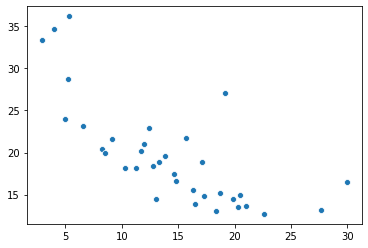

In [2]:
import seaborn as sns
sns.scatterplot(X,y)

### Simple Linear Regression

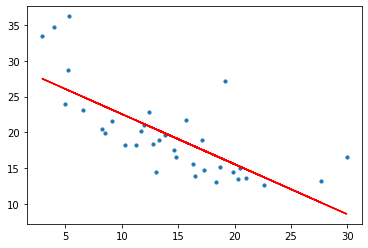

RMSE: 4.109901007971022
R2 score: 0.5397260819538162


In [3]:
# Simple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

lin_reg.fit(X_re, y_re)

y_pred = lin_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

### Polynomial Regression

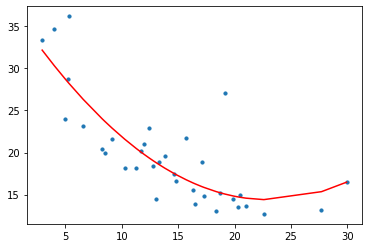

RMSE: 3.7775471605955646
R2 score: 0.6111577631639977


In [4]:
# Polynomial regression
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

lin_reg = LinearRegression()

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_re)

lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data:
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 1. Ridge Regression (Tikhonov Regularization)

During training the model, a regularization term is added to the cost function which keeps the weights as small as possible (thus preventing overfitting). This adapted cost function is called ridge regression cost function, it includes **regularizer penalty**, which is moderated by alpha (or lamda).

Thus, when we fit a model with ridge regression, we minimize the cost function: 
### cost = sum of squared residuals + lamda * (slope)^2


This introduces a small amount of Bias but reduces the Variance significantly and thus reduces the chance of overfitting the training data.

A ridge model with **alpha=0 is equivalent to the simple linear regression model** (see example below).

The **larger the hyperparameter alpha, the closer the weights end up at zero** and the result is a flat line through the data's mean.

This leads to a ridge regression model having smaller weights than without regularization (or same weights when lambda = 1).

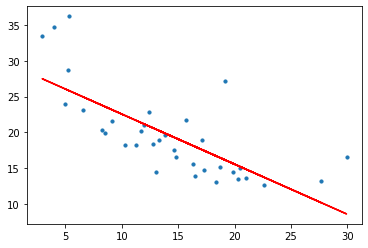

RMSE: 4.109902204828202
R2 score: 0.5397258138781507


In [5]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=1
ridge_reg = Ridge(alpha=1.0)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

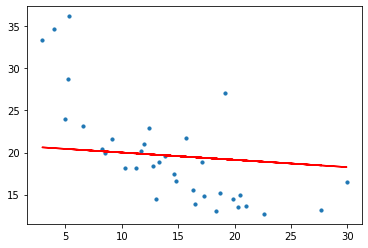

RMSE: 5.664306099570402
R2 score: 0.12572698850601627

Data mean is : 19.63714285714286


In [6]:
# define model with very large alpha
ridge_reg = Ridge(alpha=10000)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

print("\nData mean is : " + str(np.mean(y_re)))

By controlling the model weights, ridge regularization reduces the variance of a model.
Let's try ridge regularization after polynomial transformation with degree=10 versus without regularization.

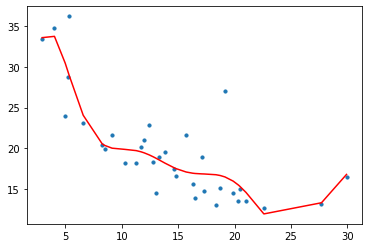

RMSE: 4.0184829346092235
R2 score: 0.5599744448774785


In [7]:
# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# polynomial transformation
polynomial_features= PolynomialFeatures(degree=10)
X_poly = polynomial_features.fit_transform(X_re)

#----------

# Model without regularization

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_re)

y_poly_pred = lin_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.05472e-29): result may not be accurate.
  overwrite_a=True).T


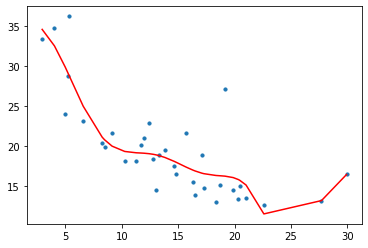

RMSE: 3.9183157683812606
R2 score: 0.5816377340057715


In [8]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=xxx
ridge_reg = Ridge(alpha=10)

# fit ridge model
ridge_reg.fit(X_poly, y_re)

# predict y
y_ridge_poly_pred = ridge_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_ridge_poly_pred), key=sort_axis)
X_re_sort, y_ridge_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_ridge_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_poly_pred))
r2 = r2_score(y_re, y_ridge_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 2. Lasso Regression

**Lasso Regression** stands for **Least Absolute Shrinkage and Selection Operator Regression**. Like Ridge, the model is regularized by adding a regularization term to the cost function, but it uses the L1 norm of the weight vector instead of half the square of the L2 norm.

Lasso regression tends to eliminate the weights of the least important features by setting them to zero. Thus, **Lasso performs feature selection** and outputs a sparse model with only a few nonzero feature weights.

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266.16215874538346, tolerance: 0.12844417142857145
  positive)


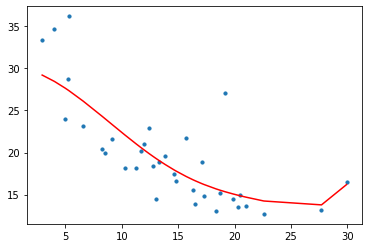

RMSE: 3.6695733053250272
R2 score: 0.6330686840293992


In [9]:
# Polynomial regression as before but using Lasso regularization

from sklearn.linear_model import Lasso

# define model with alpha=10
lasso_reg = Lasso(alpha=10)

# fit ridge model
lasso_reg.fit(X_poly, y_re)

# predict y
y_lasso_poly_pred = lasso_reg.predict(X_poly)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_lasso_poly_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_lasso_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_lasso_poly_pred))
r2 = r2_score(y_re, y_lasso_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

# 3. Elastic Net

Elastic Net is the middle ground between Ridge Regression and Lasso Regression. Its **regularization term is a mixture of those of Ridge and Lasso** and the mix ratio can be controlled by r.

When r=0, Elastic Net is equivalent to Lasso Regression
When r=1, Elastic Net is equivalent to Ridge Regression

We should avoid using Linear Regression without regularization. **Ridge Regression** is a good default but when we think that only a small number if features are relevant, we could use **Lasso Regression**. However, Lasso can behave too erratically when the number of features is greater than the number of training instances or when several features are strongly correlated. In that case, **Elastic Net** can be used instead of Lasso to control the behavior to be less extreme.

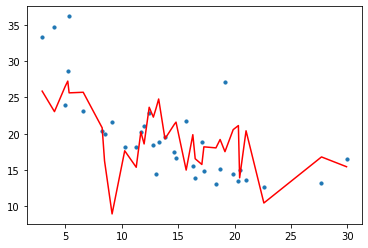

RMSE: 4.11201562278132
R2 score: 0.5392523223998349


In [10]:
from sklearn.linear_model import ElasticNet

# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5) # Lasso 50 : 50 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

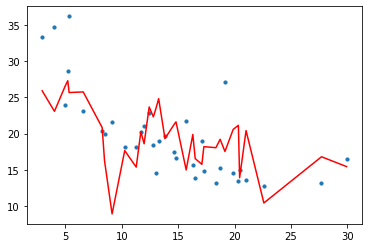

RMSE: 4.111429299795064
R2 score: 0.5393837069660432


In [11]:
# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.1) # Lasso 10 : 90 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

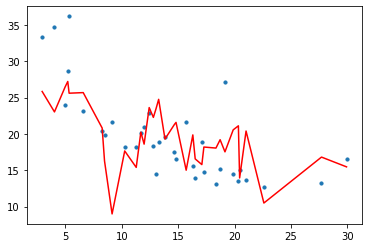

RMSE: 4.1127112209940595
R2 score: 0.5390964268982945


In [12]:
# define elastic net model
elastic_net = ElasticNet(alpha=1, l1_ratio=0.9) # Lasso 90 : 10 Ridge

# fit model
elastic_net.fit(X_re, y_re)

# predict y
y_elas_pred = elastic_net.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_elas_pred), key=sort_axis)
X_re_sort, y_lasso_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_elas_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_elas_pred))
r2 = r2_score(y_re, y_elas_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

## Why is Ridge called an L2 regularization? Why Lasso L1?

When we talk about norms in machine learning, we are talking about mathematical ways to express distance between two vectors.

**Manhattan distance** or **taxicab geometry** measure distance by summing up the right-angle distances (like a cab driving around a block).

**Euclidean distance** is the simplest form, it is how we would measure the distance between two points (diagonal distance)

When we fit a model, we have a cost function which measures the distance between the predicted and actual point. Thus, our definition of distance is relevant for the cost function.

Euclidean distance is also called the **L2 norm** and Manhattan distance is known as **L1 norm**. 

Thus, **Ridge Regression uses Euclidean Distance** and **Lasso Regressionen uses Manhattan distance** when expressing the regularization term which is added to the cost function.

More: https://www.kaggle.com/residentmario/l1-norms-versus-l2-norms


## When do we use Ridge, when Lasso?

- L1 is more robust against outliers (extreme values) than L2 since L2 squares values
- L2 is more stable than L1 (? resistance to horizontal adjustments ?)
- there is ony one numeric solution for L2 (one diagonal), but many for L1 (many ways to get from A to B in Manhattan)
- L1 is more difficult to compute than L2, since L2 has a closed form solution but L1 can only be solved piece-wise
- L1 leads to more sparsity (elimination of many feature weights) then L2